<a href="https://colab.research.google.com/github/VVlovsky/breast_cancer_logistic_regression/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [546]:
import os
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt



if not os.path.exists('./breast-cancer.data'):
  !wget https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer/breast-cancer.data
if not os.path.exists('./breast-cancer.names'):
  !wget https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer/breast-cancer.names

In [547]:
!cat './breast-cancer.names'

Citation Request:
   This breast cancer domain was obtained from the University Medical Centre,
   Institute of Oncology, Ljubljana, Yugoslavia.  Thanks go to M. Zwitter and 
   M. Soklic for providing the data.  Please include this citation if you plan
   to use this database.

1. Title: Breast cancer data (Michalski has used this)

2. Sources: 
   -- Matjaz Zwitter & Milan Soklic (physicians)
      Institute of Oncology 
      University Medical Center
      Ljubljana, Yugoslavia
   -- Donors: Ming Tan and Jeff Schlimmer (Jeffrey.Schlimmer@a.gp.cs.cmu.edu)
   -- Date: 11 July 1988

3. Past Usage: (Several: here are some)
     -- Michalski,R.S., Mozetic,I., Hong,J., & Lavrac,N. (1986). The 
        Multi-Purpose Incremental Learning System AQ15 and its Testing 
        Application to Three Medical Domains.  In Proceedings of the 
        Fifth National Conference on Artificial Intelligence, 1041-1045,
        Philadelphia, PA: Morgan Kaufmann.
        -- accuracy range: 66%-72%
     -

In [548]:
raw_data = pd.read_csv('./breast-cancer.data', names=['class', 'age', 'menopause', 'tumor_size', 'inv_nodes', 'node_caps', 'deg_malig', 'breast', 'breast_quad', 'irradiat']).sample(frac=1)
raw_data.head()

,class,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat
117,no-recurrence-events,40-49,ge40,20-24,0-2,no,3,left,left_up,no
105,no-recurrence-events,40-49,premeno,30-34,0-2,no,1,right,left_up,no
5,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no
99,no-recurrence-events,30-39,premeno,25-29,0-2,no,2,left,left_low,no
71,no-recurrence-events,40-49,premeno,25-29,0-2,no,2,right,left_up,no


In [549]:

dummies = pd.get_dummies(raw_data.menopause)
data = raw_data.join(dummies)
data = data.drop('menopause', axis=1)

dummies = pd.get_dummies(data.breast_quad)
data = data.join(dummies)
data = data.drop('breast_quad', axis=1)
data = data.drop('?', axis=1)

data.node_caps = (data.node_caps == 'yes').astype(int)
data.irradiat = (data.irradiat == 'yes').astype(int)
data['class'] = (data['class'] == 'recurrence-events').astype(int)
data.breast = (data.breast == 'left').astype(int) run with an accuracy of 91.3%. Changing the solver had a minor effect on accuracy

data.age = data.age.map(lambda x: np.mean([int(x.split('-')[0]), int(x.split('-')[1])]))
data.tumor_size = data.tumor_size.map(lambda x: np.mean([int(x.split('-')[0]), int(x.split('-')[1])]))
data.inv_nodes = data.inv_nodes.map(lambda x: np.mean([int(x.split('-')[0]), int(x.split('-')[1])]))

data = data.apply(lambda x: (x - x.min()) / ( x.max() - x.min()), axis=0)

data.head()

,class,age,tumor_size,inv_nodes,node_caps,deg_malig,breast,irradiat,ge40,lt40,premeno,central,left_low,left_up,right_low,right_up
117,0.0,0.4,0.4,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
105,0.0,0.4,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5,0.0,0.8,0.3,0.0,0.0,0.5,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
99,0.0,0.2,0.5,0.0,0.0,0.5,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
71,0.0,0.4,0.5,0.0,0.0,0.5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [550]:
y = np.asarray(data['class'].values)
x = np.asarray(data.drop('class', axis=1).values)

In [551]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
clf = LogisticRegression(penalty='l2',
                         max_iter=int(1e6),
                         warm_start=True,
                         intercept_scaling=10000.)
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.7931034482758621

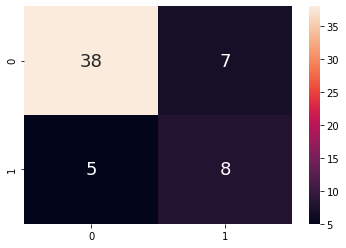

In [553]:
y_pred = clf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
sn.heatmap(cm, annot=True, annot_kws={"size": 18})
plt.show()